In [6]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


## Importing Libraries

In [7]:
import pandas as pd                          
import numpy as np                          

In [8]:
from sklearn.model_selection import train_test_split               

In [9]:
from sklearn.tree import DecisionTreeClassifier                     

In [10]:
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import classification_report                   

In [11]:
from sklearn import tree                                           

## Loading Dataset

In [12]:
Dataset = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [13]:
Dataset = Dataset.dropna()                     # Dropping empty rows

In [14]:
Dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
Dataset.shape

(150, 6)

In [16]:
Dataset["Species"].unique()                      # Unique values of Species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Changing Species Name to Numbers

In [17]:
Dataset = Dataset.replace(to_replace ="Iris-setosa",          value ="0") 
Dataset = Dataset.replace(to_replace ="Iris-versicolor",      value ="1") 
Dataset = Dataset.replace(to_replace ="Iris-virginica",       value ="2") 

## Splitting Input and Targets

In [18]:
X = np.array(Dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])                   # Input
Y = np.array(Dataset["Species"])                                                                            # Targets

## Splitting Dataset into Train/Test set

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)                                    

## Training Decision Tree

#### Using Gini Index

In [20]:
clf_gini = DecisionTreeClassifier(criterion = "gini",                
                                  max_depth = 5,                   
                                  min_samples_leaf = 3,              
                                  random_state = 100)

In [21]:
clf_gini.fit(X_train, Y_train)                                       

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

#### Using Entropy

In [22]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",        
                                     max_depth = 5,                 
                                     min_samples_leaf = 3,          
                                     random_state = 100)

In [23]:
clf_entropy.fit(X_train, Y_train)                                 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

## Evaluating The model

#### Gini Index

In [24]:
y_pred_gini = clf_gini.predict(X_test)                                

In [25]:
print ("Accuracy : ", accuracy_score(Y_test,y_pred_gini)*100)         
print ("Report : ",  classification_report(Y_test, y_pred_gini))

Accuracy :  96.66666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Entropy

In [26]:
y_pred_entropy = clf_entropy.predict(X_test)                               

In [27]:
print ("Accuracy : ", accuracy_score(Y_test,y_pred_entropy)*100)            
print ("Report : ",  classification_report(Y_test, y_pred_entropy))

Accuracy :  96.66666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



## Visualizing Decision tree

#### Gini Index

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(209.25, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

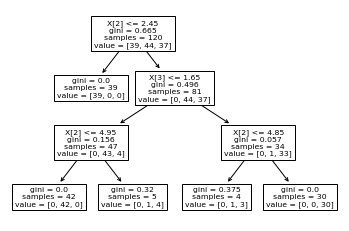

In [28]:
tree.plot_tree(clf_gini)

#### Entropy

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\nentropy = 1.581\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\nentropy = 0.42\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

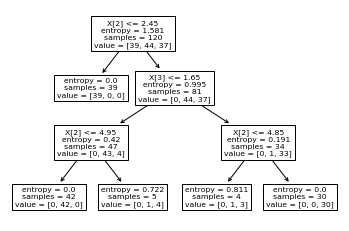

In [29]:
tree.plot_tree(clf_entropy)